In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Model
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape


(1025, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#DATA EXPLORATION

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

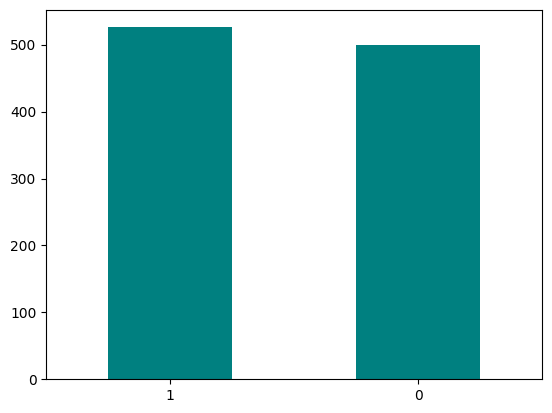

In [ ]:
df["target"].value_counts().plot(kind='bar',color="teal")
plt.xticks(rotation=0)
#1--> Heart Disease
#0--> Normal Health

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

isna( ): This method is used to create a boolean mask that identifies missing values in the DataFrame. It returns a DataFrame of the same shape as the original, where each element is either True if the corresponding value in df is missing, or False otherwise.


sum( ): it sums the values for each column, treating True as 1 and False as 0. As a result, it calculates the total number of missing values in each column.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


By default, only the numerical columns are included in the output, and any


---


non-numeric columns are excluded.

**TARGET VS SEX**

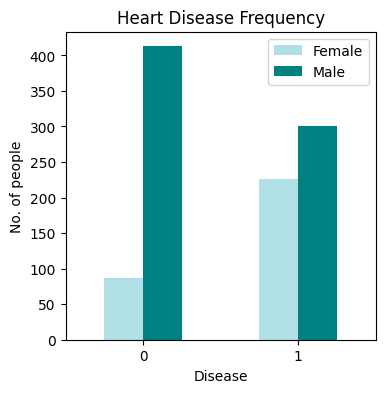

In [ ]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize=(4,4),color={"powderblue","teal"})
plt.title("Heart Disease Frequency")
plt.xlabel("Disease")
plt.ylabel("No. of people")
plt.legend(["Female","Male"]);
plt.xticks(rotation=1);

HEART DISEASE FREQUENCY PER CHEST PAIN TYPE


* 0=Typical angina
* 1=Atypical angina
* 2=Non-anginal Pain
* 3=Asymtomatic

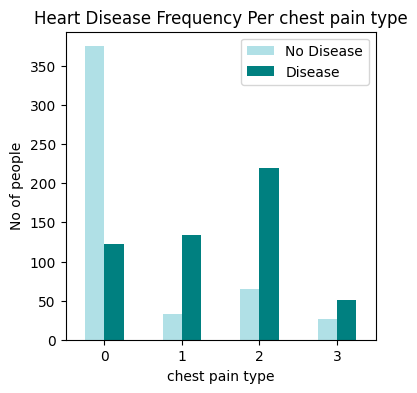

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(4,4),color={"teal","powderblue"})
plt.title("Heart Disease Frequency Per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("No of people")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

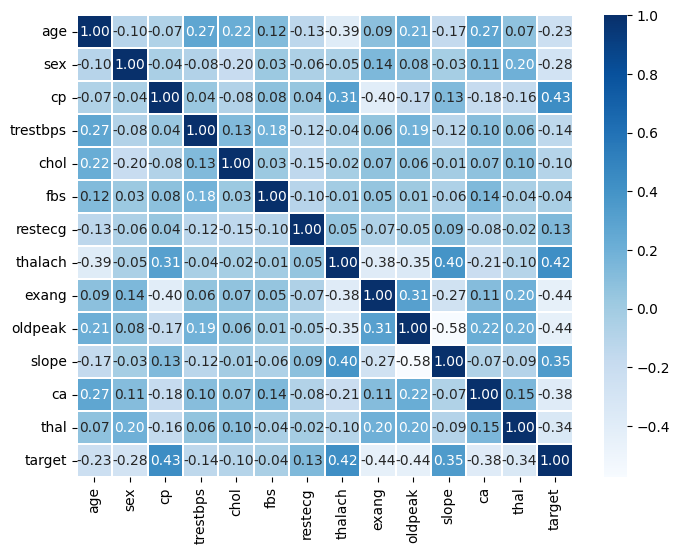

In [ ]:
ax=plt.figure(figsize=(8,6))
ax=sns.heatmap(df.corr(),annot=True,linewidths=0.1,fmt=".2f",cmap="Blues")

Only ***Chest Pain*** , ***Max Heart Rate(thalach)*** and ***Slope*** have a fairly strong positive correlation with our Target feature.

# DATA PREPROCESSING

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Categorical variables are those with a small number of unique values, such as sex and chest pain type.
Continuous variables are those with a large number of unique values, such as age and blood pressure.

The categorical variables  are converted into a set of binary variables, one for each unique valu

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)

In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

These lines standardize the continuous variables. Standardization is a process of scaling the variables so that they have a mean of 0 and a standard deviation of 1. This is important for machine learning algorithms, as it can help to improve their performance





In [ ]:
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# MODEL BUILDING

In [ ]:
X=dfs.drop("target",axis=1)
Y=dfs["target"]

In [ ]:
np.random.seed(42)

If we don't specify the random.seed in our code, then every time we run(execute) our code a new random value is generated and the train and test datasets would have different values each time.




In [ ]:
#Splitting in train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model= KNeighborsClassifier()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.8760330578512396

In [ ]:
model.score(X_test,Y_test)

0.9016393442622951

# IMPORVING THE MODEL

In [ ]:
#Tuning KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)

    #update the training scores list
    train_scores.append(knn.score(X_train,Y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test,Y_test))

In [ ]:
test_scores

[0.8032786885245902,
 0.819672131147541,
 0.8688524590163934,
 0.8524590163934426,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.9180327868852459,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442]

# PREDICTION

In [ ]:
knn.set_params(n_neighbors=4)
Y_pred1 = knn.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))

0.8524590163934426


In [ ]:
precision_score(Y_test,Y_pred1)

0.9259259259259259